## Prueba de modelos ##

### Version 4: Modelo con 2 DER, planificación anual, granularidad horaria ###

Si el modelo tiene que optimizar el balance por horas, tiene 8640 VD, pero sigue teniendo 2 VD binarias

In [89]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [90]:
%autoreload 2

In [91]:
import pandapower as pp

In [92]:
import pyomo.environ as pe

In [93]:
import matplotlib.pyplot as plt

In [94]:
import ModelWriters as mw

In [95]:
import ModelWriters.Scenes as Scenes

In [96]:
import ModelWriters.Resources as Resources

In [97]:
net = pp.create_empty_network() 
b0 = pp.create_bus(net, vn_kv=13.2)  #0

pp.create_ext_grid(net, bus=b0)

#ramal 1
b11 = pp.create_bus(net, vn_kv=13.2)  #1
b12 = pp.create_bus(net, vn_kv=13.2)  #2
b113 = pp.create_bus(net, vn_kv=13.2)  #3

pp.create_line(net, from_bus=b0, to_bus=b11, length_km=0.8, std_type="NAYY 4x50 SE") #0
pp.create_line(net, from_bus=b11, to_bus=b12, length_km=2.1, std_type="NAYY 4x50 SE") #1
pp.create_line(net, from_bus=b11, to_bus=b113, length_km=1.73, std_type="NAYY 4x50 SE") #2

pp.create_sgen(net, b113, p_mw=0.075, q_mvar=0.025, max_p_mw=0.15, max_q_mvar=0.15)
pp.create_load(net, bus=b12, p_mw=0.350)

#ramal 2
b21 = pp.create_bus(net, vn_kv=13.2) #3
pp.create_line(net, from_bus=b0, to_bus=b21, length_km=5.0, std_type="NAYY 4x50 SE")
pp.create_sgen(net, b21, p_mw=0.15, q_mvar=0.00, max_p_mw=0.40, max_q_mvar=0.10)
pp.create_storage(net, bus=b21, p_mw=0.25, q_mvar=0.1, max_e_mwh = 3.0)

#ramal 3
b31 = pp.create_bus(net, vn_kv=13.2) #4
b32 = pp.create_bus(net, vn_kv=13.2) #5
pp.create_line(net, from_bus=b0, to_bus=b31, length_km=0.5, std_type="NAYY 4x50 SE")
pp.create_line(net, from_bus=b31, to_bus=b32, length_km=1.5, std_type="NAYY 4x50 SE")
pp.create_sgen(net, b31, p_mw=0.08, q_mvar=0.00, max_p_mw=0.30, max_q_mvar=0.10)
pp.create_load(net, bus=b32, p_mw=0.85, q_mvar=0.33)


#ramal 4
b41 = pp.create_bus(net, vn_kv=13.2) #6
pp.create_line(net, from_bus=b0, to_bus=b41, length_km=0.5, std_type="NAYY 4x50 SE")
pp.create_load(net, bus=b41, p_mw=0.22, q_mvar=0.05)
#pp.create_storage(net, bus=b41, p_mw=0.5, q_mvar=0.1, max_e_mwh = 5.0)


net.line['max_i_ka'][2] = 0.35/(1.73*13.2)

In [98]:
net.line

,name,std_type,from_bus,to_bus,length_km,r_ohm_per_km,x_ohm_per_km,c_nf_per_km,g_us_per_km,max_i_ka,df,parallel,type,in_service
0,None,NAYY 4x50 SE,0,1,0.80,0.642,0.083,210.0,0.0,0.142000,1.0,1,cs,True
1,None,NAYY 4x50 SE,1,2,2.10,0.642,0.083,210.0,0.0,0.142000,1.0,1,cs,True
2,None,NAYY 4x50 SE,1,3,1.73,0.642,0.083,210.0,0.0,0.015327,1.0,1,cs,True
3,None,NAYY 4x50 SE,0,4,5.00,0.642,0.083,210.0,0.0,0.142000,1.0,1,cs,True
4,None,NAYY 4x50 SE,0,5,0.50,0.642,0.083,210.0,0.0,0.142000,1.0,1,cs,True
5,None,NAYY 4x50 SE,5,6,1.50,0.642,0.083,210.0,0.0,0.142000,1.0,1,cs,True
6,None,NAYY 4x50 SE,0,7,0.50,0.642,0.083,210.0,0.0,0.142000,1.0,1,cs,True


In [99]:
 pp.runpp(net)

In [100]:
print(net.res_bus.vm_pu)
print(net.res_line)

0    1.000000
1    0.999214
2    0.996508
3    0.999721
4    0.997983
5    0.998497
6    0.993536
7    0.999583
Name: vm_pu, dtype: float64
   p_from_mw  q_from_mvar   p_to_mw     q_to_mvar     pl_mw   ql_mvar  \
0   0.276240    -0.077931 -0.275999  6.877317e-02  0.000241 -0.009158   
1   0.350956    -0.023913 -0.350000 -3.856887e-15  0.000956 -0.023913   
2  -0.074956    -0.044860  0.075000  2.500000e-02  0.000044 -0.019860   
3   0.100279     0.042676 -0.100000 -1.000000e-01  0.000279 -0.057324   
4   0.775911     0.307919 -0.774624 -3.134920e-01  0.001287 -0.005573   
5   0.854624     0.313492 -0.850000 -3.300000e-01  0.004624 -0.016508   
6   0.220093     0.044267 -0.220000 -5.000000e-02  0.000093 -0.005733   

   i_from_ka   i_to_ka      i_ka  vm_from_pu  va_from_degree  vm_to_pu  \
0   0.012554  0.012451  0.012554    1.000000        0.000000  0.999214   
1   0.015398  0.015362  0.015398    0.999214       -0.018431  0.996508   
2   0.003824  0.003459  0.003824    0.999214       -0

In [101]:
print(net)

This pandapower network includes the following parameter tables:
   - bus (8 elements)
   - load (3 elements)
   - sgen (3 elements)
   - storage (1 element)
   - ext_grid (1 element)
   - line (7 elements)
 and the following results tables:
   - res_bus (8 elements)
   - res_line (7 elements)
   - res_ext_grid (1 element)
   - res_load (3 elements)
   - res_sgen (3 elements)
   - res_storage (1 element)


## Construcción de Escenarios

In [102]:
#s = Scenes.SceneBuilder(years = 4, subperiods = 1, days_in_subperiods = 1, dt=24, growth_rate = 0.025, discount_rate = 0.05)
#s = Scenes.SceneBuilder(years = 4, subperiods = 4, days_in_subperiods = 1, dt=1, growth_rate = 0.025, discount_rate = 0.05)
#s = Scenes.SceneBuilder(years = 20, subperiods = 4, days_in_subperiods = 5, dt=2, growth_rate = 0.025, discount_rate = 0.03)
s = Scenes.SceneBuilder(years = 20, subperiods = 4, days_in_subperiods = 7, growth_rate = 0.025, discount_rate = 0.03)
#s = Scenes.SceneBuilder(years = 20, subperiods = 1, days_in_subperiods = 365, dt = 1, growth_rate = 0.025, discount_rate = 0.03)
scenes = s.build_scenes()
scenes

,year,day,dd,hour,dt,growth,discount,solar_irradiance,wind_speed
0,0.0,0.0,13.035714,0.0,1.0,1.00000,1.000000,0.0,1.575145
1,0.0,0.0,13.035714,1.0,1.0,1.00000,1.000000,0.0,2.879862
2,0.0,0.0,13.035714,2.0,1.0,1.00000,1.000000,0.0,3.082286
3,0.0,0.0,13.035714,3.0,1.0,1.00000,1.000000,0.0,6.487905
4,0.0,0.0,13.035714,4.0,1.0,1.00000,1.000000,0.0,7.555838
...,...,...,...,...,...,...,...,...,...
13435,19.0,279.0,13.035714,19.0,1.0,1.59865,0.570286,0.0,10.403014
13436,19.0,279.0,13.035714,20.0,1.0,1.59865,0.570286,0.0,11.695665
13437,19.0,279.0,13.035714,21.0,1.0,1.59865,0.570286,0.0,9.940168
13438,19.0,279.0,13.035714,22.0,1.0,1.59865,0.570286,0.0,8.996847


## Model Construction

Construccion automatica del modelo
Es un modelo de dimensionamiento de 3 DERs (WT+PV)

In [103]:
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = 2.0)
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_cost = None)
#model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_hours = 4000)
model_writer = mw.MultiBusbarModelWriter(net, scenes, overload_hours = 15000)

In [104]:
net.ext_grid['model'][0] = Resources.ExtGrid('SET', pr_mw = 5.0, peak_value=200, valley_value=120, rest_value=160)
#net.ext_grid['model'][0] = Resources.ExtGrid('SET', pr_mw = 5.0, peak_value=2000, valley_value=1500, rest_value=1000)

In [105]:
net.load['model'][0] = Resources.Load('Tornquinst', pr_mw = 0.35)
net.load['model'][1] = Resources.Load('Bell Ville', pr_mw = 0.85)
net.load['model'][2] = Resources.Load('City Bell', pr_mw = 0.22)

In [106]:
net.sgen['model'][0] = Resources.PVGenerator('PV1', ic_0_mu = 0.0, ic_1_mu = 1.02e6, oc_0_mu = 1.02, oc_1_mu = 0.0)
net.sgen['model'][1] = Resources.WTGeneratorDiscrete('WT1', unit_size_mw = 0.19, unit_cost_mu = 541e3, oc_0_mu = 0.00, oc_1_mu = 1.70)
#net.sgen['model'][2] = Resources.PVGeneratorDiscrete('PV2', unit_size_mw = 0.05, unit_cost_mu = 51e3, oc_0_mu = 0.03, oc_1_mu = 0.0)

In [107]:
net.storage['model'][0] = Resources.Storage('ST1', ic_1_mu = 554e3, ic_1_mu_cap = 330e3, oc_1_mu = 2.28*4, eta_bb = 0.8, sigma = 2.1e-3)

## Resolution

In [108]:
import os

In [109]:
os.environ['NEOS_EMAIL'] = 'juan.manuel.sardon@gmail.com'

In [110]:
model = model_writer.create_model()

In [111]:
if len(scenes) < 40:
    model.pprint()

In [ ]:
solver_manager = pe.SolverManagerFactory('neos')
result_obj = solver_manager.solve(model, opt='cplex')

##opt = pe.SolverFactory('cplex')
#opt = pe.SolverFactory('glpk')
#result_obj= opt.solve(model, tee=True)

In [67]:
model_writer.backconfigure_network()

In [68]:
model_writer.net.sgen

,name,bus,p_mw,q_mvar,sn_mva,scaling,in_service,type,current_source,max_p_mw,max_q_mvar,model
0,None,3,0.075,0.025,NaN,1.0,True,wye,True,0.601698,0.300849,Resource: PV1
1,None,4,0.150,0.000,NaN,1.0,True,wye,True,0.000000,0.000000,Resource: WT1
2,None,5,0.080,0.000,NaN,1.0,True,wye,True,0.300000,0.100000,None


In [358]:
net.sgen['model'][2].units.value

AttributeError: 'NoneType' object has no attribute 'units'

In [69]:
model_writer.net.storage

,name,bus,p_mw,q_mvar,sn_mva,soc_percent,min_e_mwh,max_e_mwh,scaling,in_service,type,model
0,None,4,0.25,0.1,NaN,NaN,0.0,0.0,1.0,True,None,Resource: ST1


In [70]:
Resultados = model_writer.get_scenes_results()

In [71]:
Resultados

,SET_p_mw,Tornquinst_p_mw,Bell Ville_p_mw,City Bell_p_mw,PV1_p_mw,WT1_p_mw,ST1_p_mw,ST1_soc_mwh,L 0_1_pf_mw,L 0_1_ep_h,...,L 1_3_pf_mw,L 1_3_ep_h,L 0_4_pf_mw,L 0_4_ep_h,L 0_5_pf_mw,L 0_5_ep_h,L 5_6_pf_mw,L 5_6_ep_h,L 0_7_pf_mw,L 0_7_ep_h
0,0.351345,-0.080218,-0.217112,-0.054015,0.0,0.0,0.0,0.0,-0.080218,0.0,...,0.0,0.0,0.0,0.0,-0.217112,0.0,-0.217112,0.0,-0.054015,0.0
1,0.366474,-0.098965,-0.223529,-0.043980,0.0,0.0,0.0,0.0,-0.098965,0.0,...,0.0,0.0,0.0,0.0,-0.223529,0.0,-0.223529,0.0,-0.043980,0.0
2,0.288644,-0.068699,-0.164762,-0.055183,0.0,0.0,0.0,0.0,-0.068699,0.0,...,0.0,0.0,0.0,0.0,-0.164762,0.0,-0.164762,0.0,-0.055183,0.0
3,0.361808,-0.090402,-0.217962,-0.053444,0.0,0.0,0.0,0.0,-0.090402,0.0,...,0.0,0.0,0.0,0.0,-0.217962,0.0,-0.217962,0.0,-0.053444,0.0
4,0.372581,-0.099681,-0.224807,-0.048093,0.0,0.0,0.0,0.0,-0.099681,0.0,...,0.0,0.0,0.0,0.0,-0.224807,0.0,-0.224807,0.0,-0.048093,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,1.278141,-0.306470,-0.771137,-0.200534,0.0,0.0,0.0,0.0,-0.306470,0.0,...,0.0,0.0,0.0,0.0,-0.771137,0.0,-0.771137,0.0,-0.200534,0.0
380,1.169277,-0.292429,-0.682726,-0.194122,0.0,0.0,0.0,0.0,-0.292429,0.0,...,0.0,0.0,0.0,0.0,-0.682726,0.0,-0.682726,0.0,-0.194122,0.0
381,1.342877,-0.345535,-0.817562,-0.179780,0.0,0.0,0.0,0.0,-0.345535,0.0,...,0.0,0.0,0.0,0.0,-0.817562,0.0,-0.817562,0.0,-0.179780,0.0
382,0.388369,-0.080364,-0.246996,-0.061008,0.0,0.0,0.0,0.0,-0.080364,0.0,...,0.0,0.0,0.0,0.0,-0.246996,0.0,-0.246996,0.0,-0.061008,0.0


In [72]:
def plot_results(results, a = 0, b = 240, items = None, elements = False, lines = False, l_ep = False):
    # Set the plot curve with markers and a title
    if not (elements or lines or l_ep or items):
        raise Exception("Nothing to plot")
    
    fig, ax = plt.subplots(1, 1)

    fig.set_size_inches(10,6)
    
    for col in results:
        p = False
        if items and col in items:
            p = True
        elif col[0:2] == 'L ':
            if col[-4:] == 'ep_h':
                if l_ep:
                    p = True
            elif lines:
                p = True
        elif elements:
            p = True

        if p:
            ax.plot(results[col][a:b], label = col)
    
    ax.set_xlabel('time')
    ax.set_ylabel('P[mw]')

    ax.legend()

    ax.grid(True)


    plt.show()
    

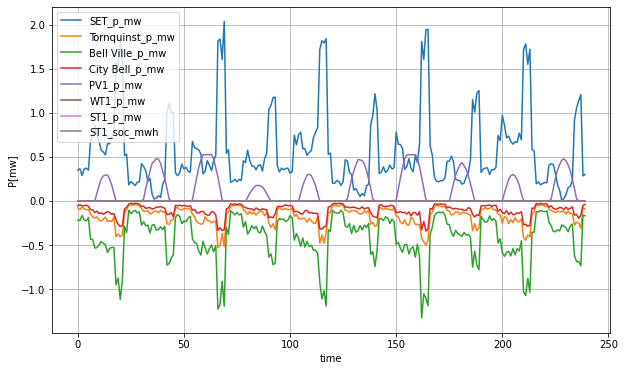

In [73]:
plot_results(Resultados, a = 0, b = 240, elements = True, lines = False, l_ep = False)

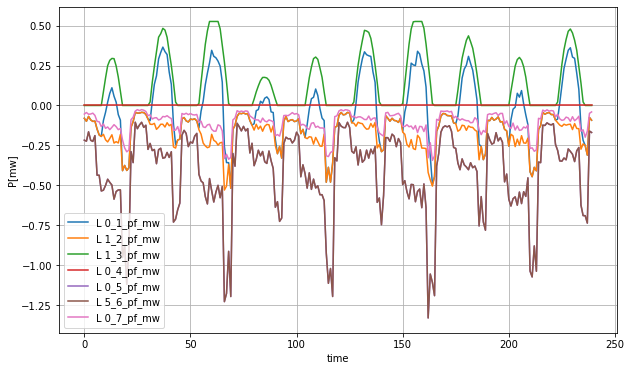

In [74]:
plot_results(Resultados, a = 0, b = 240, lines = True)

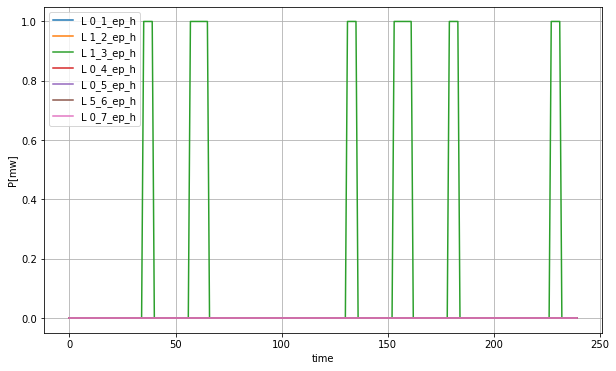

In [75]:
plot_results(Resultados, a = 0, b = 240, l_ep = True)

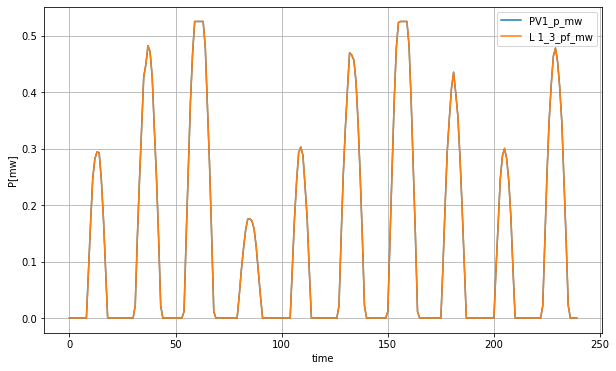

In [76]:
plot_results(Resultados, a = 0, b = 240, items = ['PV1_p_mw', 'L 1_3_pf_mw'])

In [77]:
for l in range(len(net.line)):
    print("Line: {0} - TEPH: {1}".format(net.line.model[l].name, net.line.model[l].get_tep_h()))

Line: L 0_1 - TEPH: 0.0
Line: L 1_2 - TEPH: 0.0
Line: L 1_3 - TEPH: 6478.75
Line: L 0_4 - TEPH: 0.0
Line: L 0_5 - TEPH: 0.0
Line: L 5_6 - TEPH: 0.0
Line: L 0_7 - TEPH: 0.0


In [369]:
net.line['model'][0].get_tep_h()

0.0

In [ ]:
net.line['model'][2].name

In [ ]:
net.line['model'][2].pr_mw

In [ ]:
net.line['model'][4].name

In [ ]:
net.line['model'][4].pr_mw